## Data Analytics and Visualization of a longer (200 km +) bike ride
#### The session was measured with a Polar Vantage V watch, raw data is generated by polar
#### Input (2 files):
- training (csv) for speed, elevation, etc
- gps coordinates (gpx)

The training csv file needs to be cleaned (split up into time series and reference data pars)

In [1]:
import pandas as pd
import os
import gpxpy
import matplotlib.pyplot as plt
from pprint import pprint

In [2]:
folder = ".\data\\"
file_list = os.listdir(folder)

for index, file in enumerate(file_list):
    file = (index, folder + file)
    file_list[index] = file
    
filelist_df = pd.DataFrame(file_list, columns=['index', 'file_path']).set_index('index')
filelist_df['extension'] = filelist_df.file_path.str.split('.').str[-1].str.lower()

labels = {'csv': 'training', 'gpx': 'gps'}
filelist_df['label'] = filelist_df.extension.map(labels)
filelist_df.set_index('label', inplace=True)
display(filelist_df)

,file_path,extension
label,,
training,.\data\Andrew_Szabo_2021-06-25_04-37-58.CSV,csv
gps,.\data\Andrew_Szabo_2021-06-25_04-37-58.GPX,gpx


In [3]:
training = pd.read_csv(filelist_df.loc['training', 'file_path'])

# gpx file step 1 (gpxpy.parse the file)
with open(filelist_df.loc['gps', 'file_path'], 'r') as f:
    gpx_file = gpxpy.parse(f)
# gpx file step 2 (segment)   
segment = gpx_file.tracks[0].segments[0]

# # gpx file step 3 (loop through segment.points)
coordinates = pd.DataFrame([{
    'time': p.time,
    'latitude': p.latitude,
    'longitude': p.longitude,
    'elevation': p.elevation} for p in segment.points
])
coordinates.set_index('time', inplace=True)

c:\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (0,2,3,5,6,7,8,9,10,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df_names = ["training", "coordinates"]
df_list = [training, coordinates]
df_zipped = zip(df_names, df_list)

for name, df in df_zipped:
    print("df name: " + name)
    display(df.head(10))
    
#clean df variable from memory
df = '_'

df name: training


,Name,Sport,Date,Start time,Duration,Total distance (km),Average heart rate (bpm),Average speed (km/h),Max speed (km/h),Average pace (min/km),...,Descent (m),Average power (W),Max power (W),Notes,Height (cm),Weight (kg),HR max,HR sit,VO2max,Unnamed: 27
0,Andrew Szabo,CYCLING,2021.06.25,04:37:58 AM,09:33:46,207.37,114,21.7,52.0,02:46,...,571.0,NaN,NaN,"Early start: wake up at 4 am. After 10, it was...",189.0,96.0,189.0,55.0,49.0,NaN
1,Sample rate,Time,HR (bpm),Speed (km/h),Pace (min/km),Cadence,Altitude (m),Stride length (m),Distances (m),Temperatures (C),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,00:00:00,87,0.0,00:00,NaN,116,NaN,0.00,26.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,00:00:01,87,0.0,00:00,NaN,116,NaN,0.00,26.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,00:00:02,87,0.0,00:00,NaN,116,NaN,0.00,26.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,00:00:03,87,0.0,00:00,NaN,116,NaN,0.00,26.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,00:00:04,87,3.7,16:10,NaN,116,NaN,0.00,26.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,00:00:05,86,5.6,10:42,NaN,118,NaN,0.60,26.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,00:00:06,86,7.0,08:34,53,118,NaN,1.50,26.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,00:00:07,85,8.5,07:02,54,118,NaN,3.90,26.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


df name: coordinates


,latitude,longitude,elevation
time,,,
2021-06-25 02:37:59.188000+00:00,46.754178,17.570482,90.0
2021-06-25 02:38:00.188000+00:00,46.754178,17.570482,90.0
2021-06-25 02:38:01.188000+00:00,46.754175,17.570480,90.0
2021-06-25 02:38:02.188000+00:00,46.754157,17.570477,90.0
2021-06-25 02:38:03.188000+00:00,46.754137,17.570477,91.0
2021-06-25 02:38:04.189000+00:00,46.754112,17.570482,91.0
2021-06-25 02:38:05.189000+00:00,46.754082,17.570493,91.0
2021-06-25 02:38:06.188000+00:00,46.754048,17.570507,91.0
2021-06-25 02:38:07.188000+00:00,46.754013,17.570518,92.0


#### Training file should be 2 distinct dataframes:
- Header and first row are reference data (static/calculated based on the time series (ts))
- Not nan part of the 2nd row is the new header for the ts data starting from the 3rd row

In [5]:
training_meta = training.iloc[0,:]
display(training_meta)

Name                                                                  Andrew Szabo
Sport                                                                      CYCLING
Date                                                                    2021.06.25
Start time                                                             04:37:58 AM
Duration                                                                  09:33:46
Total distance (km)                                                         207.37
Average heart rate (bpm)                                                       114
Average speed (km/h)                                                          21.7
Max speed (km/h)                                                              52.0
Average pace (min/km)                                                        02:46
Max pace (min/km)                                                            01:09
Calories                                                                    5785.0
Fat 

In [6]:
#create ts header, drop nulls
new_ts_cols = [x for x in training.iloc[1,:] if pd.isnull(x) == False]
print(new_ts_cols)

['Sample rate', 'Time', 'HR (bpm)', 'Speed (km/h)', 'Pace (min/km)', 'Cadence', 'Altitude (m)', 'Stride length (m)', 'Distances (m)', 'Temperatures (C)', 'Power (W)']


In [7]:
training_ts = training.iloc[2:, :len(new_ts_cols)]
incorrect_cols = training_ts.columns

In [8]:
col_replace_rule = {bad: good for bad, good in zip(incorrect_cols, new_ts_cols)}
pprint(col_replace_rule)

{'Average heart rate (bpm)': 'Altitude (m)',
 'Average pace (min/km)': 'Temperatures (C)',
 'Average speed (km/h)': 'Stride length (m)',
 'Date': 'HR (bpm)',
 'Duration': 'Pace (min/km)',
 'Max pace (min/km)': 'Power (W)',
 'Max speed (km/h)': 'Distances (m)',
 'Name': 'Sample rate',
 'Sport': 'Time',
 'Start time': 'Speed (km/h)',
 'Total distance (km)': 'Cadence'}


In [9]:
training_ts.rename(columns=col_replace_rule)

,Sample rate,Time,HR (bpm),Speed (km/h),Pace (min/km),Cadence,Altitude (m),Stride length (m),Distances (m),Temperatures (C),Power (W)
2,1,00:00:00,87,0.0,00:00,NaN,116,NaN,0.00,26.9,NaN
3,NaN,00:00:01,87,0.0,00:00,NaN,116,NaN,0.00,26.9,NaN
4,NaN,00:00:02,87,0.0,00:00,NaN,116,NaN,0.00,26.9,NaN
5,NaN,00:00:03,87,0.0,00:00,NaN,116,NaN,0.00,26.9,NaN
6,NaN,00:00:04,87,3.7,16:10,NaN,116,NaN,0.00,26.9,NaN
...,...,...,...,...,...,...,...,...,...,...,...
34423,NaN,09:33:41,110,13.6,04:25,0,128,NaN,207360.8,29.0,NaN
34424,NaN,09:33:42,109,11.4,05:16,0,128,NaN,207362.59,29.0,NaN
34425,NaN,09:33:43,108,9.1,06:36,0,128,NaN,207364.59,29.0,NaN
34426,NaN,09:33:44,108,7.9,07:38,0,128,NaN,207365.7,29.0,NaN


In [10]:
df_list.remove(training)

try:
    df_list.remove(training)
except:
    pass
df_list = df_list + [training_meta, training_ts]

df_names.remove("training")
df_names = df_names + ['training_meta', 'training_ts']
df_names

['coordinates', 'training_meta', 'training_ts']

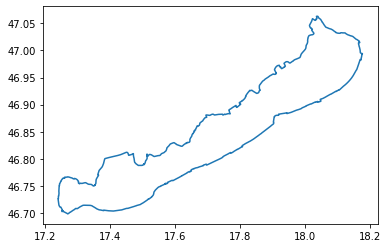

In [11]:
plt.plot(coordinates['longitude'], coordinates['latitude'])